# Part 1: Data Preprocessing & Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.drop('id', axis = 1, inplace = True)
df.drop('Unnamed: 32', axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Encoding Categorical Data

In [3]:
diagnosis_map = {'B': 0, 'M': 1}
df['diagnosis'] = df.diagnosis.map(diagnosis_map)
df.to_csv('preprocessed_breast_cancer.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### What about Missing Values?

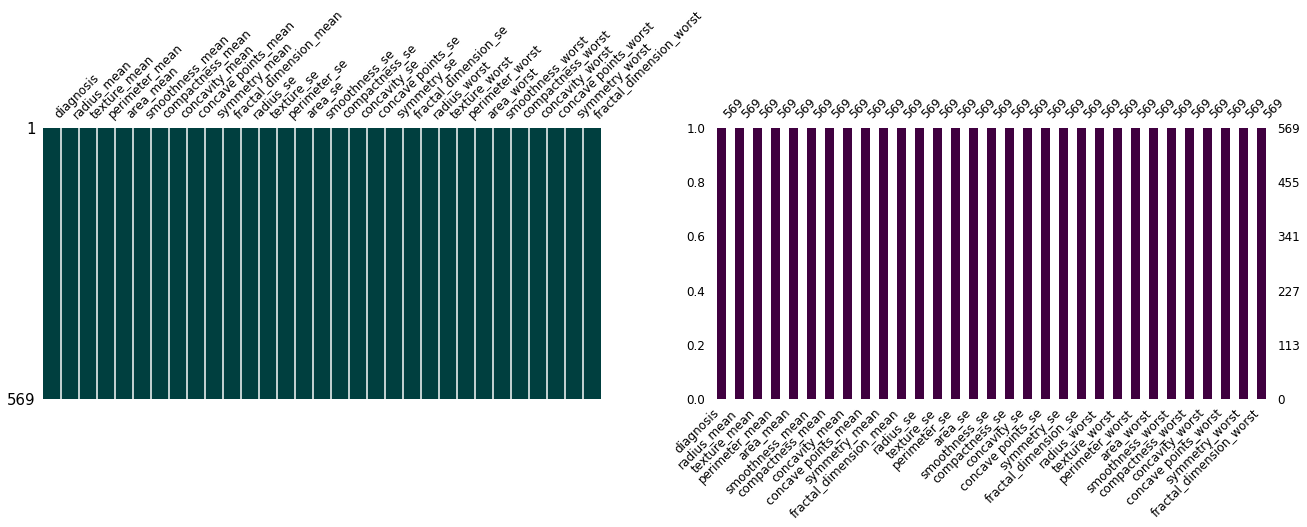

In [4]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,5))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

In [5]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

miss = dfmiss(df)
miss.head(50)

,data_type,unique_values,have_null?,how many?,%
diagnosis,int64,2,False,0,0.0
radius_mean,float64,456,False,0,0.0
texture_mean,float64,479,False,0,0.0
perimeter_mean,float64,522,False,0,0.0
area_mean,float64,539,False,0,0.0
smoothness_mean,float64,474,False,0,0.0
compactness_mean,float64,537,False,0,0.0
concavity_mean,float64,537,False,0,0.0
concave points_mean,float64,542,False,0,0.0
symmetry_mean,float64,432,False,0,0.0


## Corelation between the Features

### Linearly Corelated

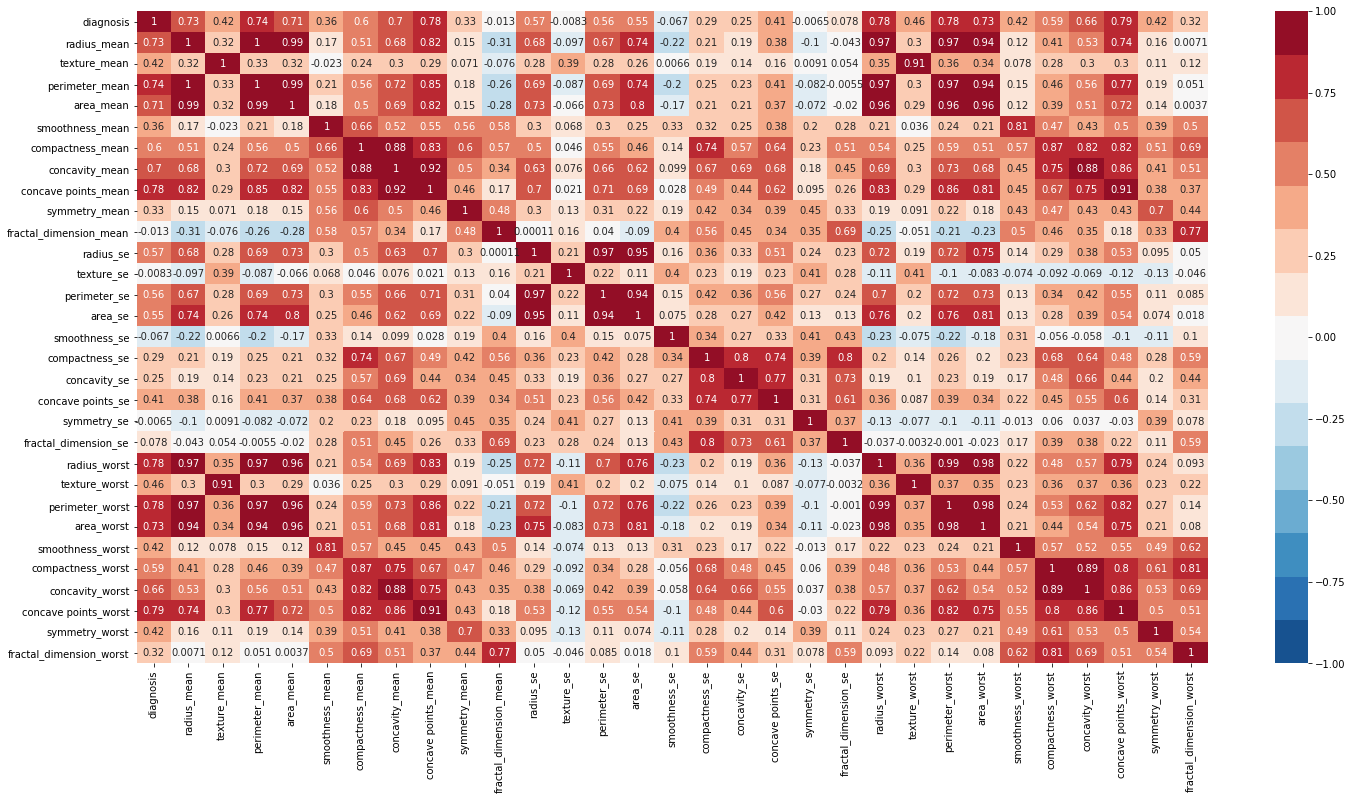

In [6]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

### Monotonically Corelated

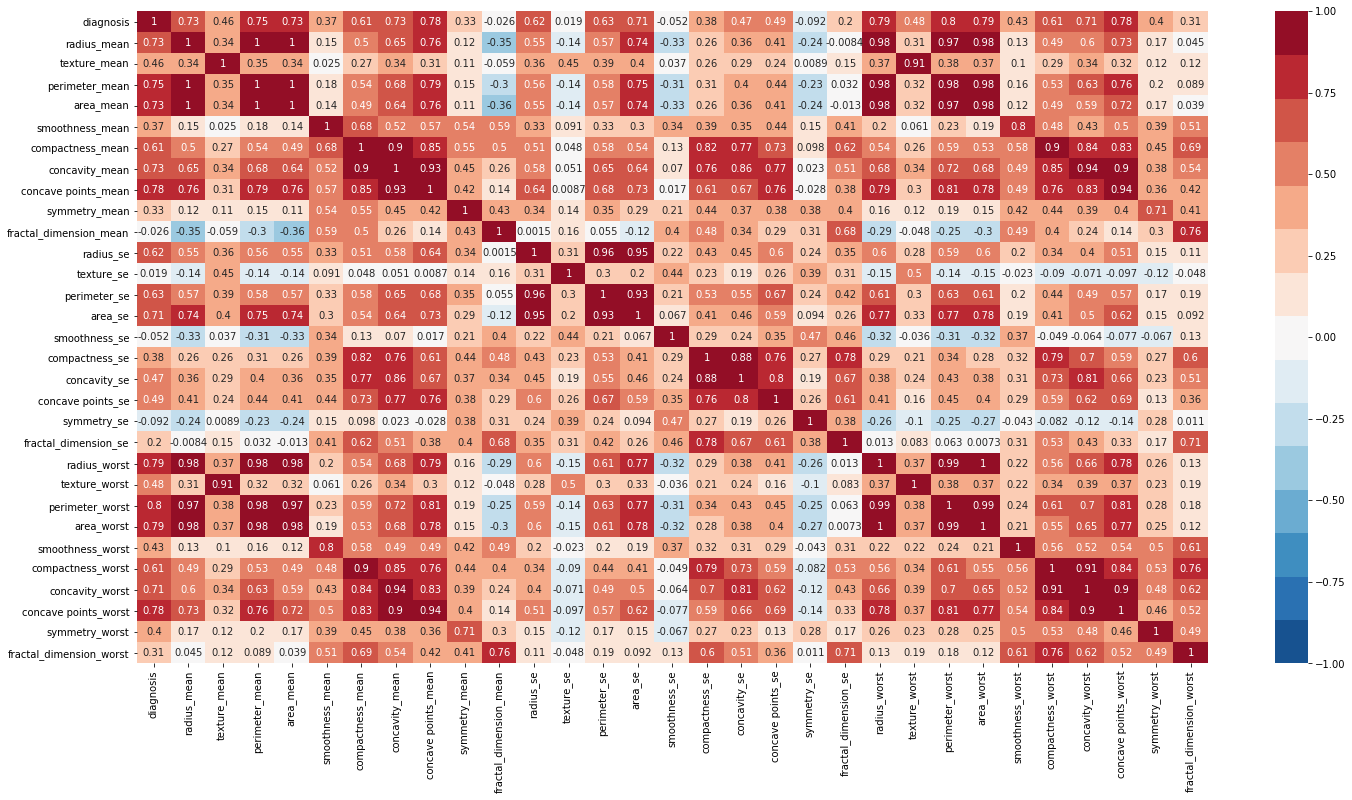

In [7]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

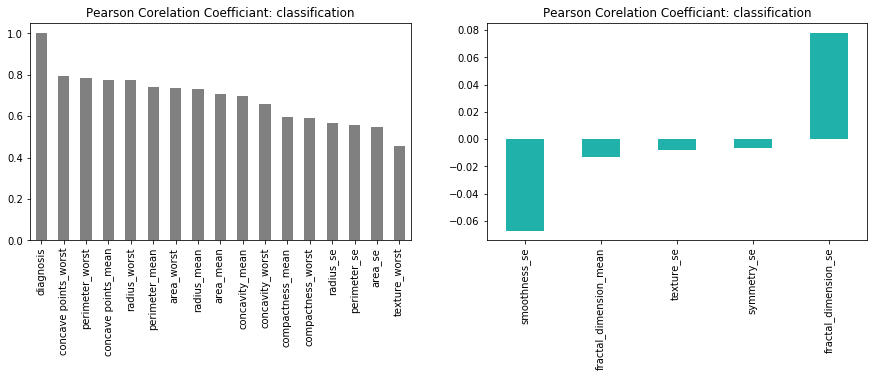

In [8]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
df.corr(method='pearson')['diagnosis'].nlargest(17).plot(kind='bar', color = 'gray')
plt.title('Pearson Corelation Coefficiant: {}'.format('classification'))

plt.subplot(1,2,2)
df.corr(method='pearson')['diagnosis'].nsmallest(5).plot(kind='bar', color = 'lightseagreen')
plt.title('Pearson Corelation Coefficiant: {}'.format('classification'))
plt.show()

In [9]:
l_p = df.corr(method='pearson')['diagnosis'].nlargest(17)
pearson= l_p.to_frame()
pearson

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


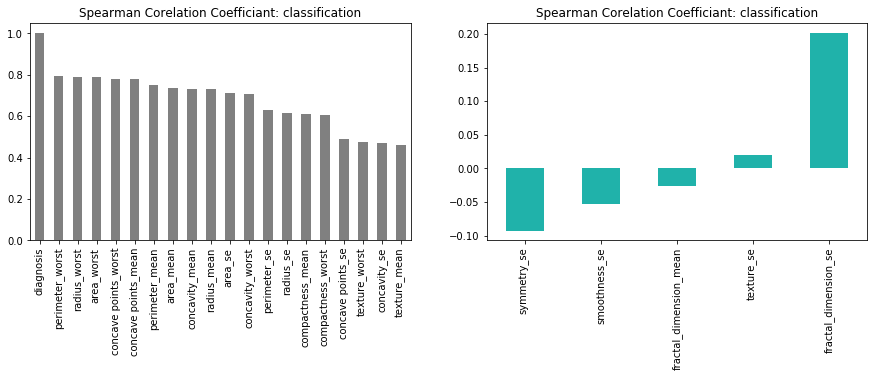

In [10]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
df.corr(method='spearman')['diagnosis'].nlargest(20).plot(kind='bar', color = 'gray')
plt.title('Spearman Corelation Coefficiant: {}'.format('classification'))

plt.subplot(1,2,2)
df.corr(method='spearman')['diagnosis'].nsmallest(5).plot(kind='bar', color = 'lightseagreen')
plt.title('Spearman Corelation Coefficiant: {}'.format('classification'))
plt.show()

In [11]:
l_s = df.corr(method='spearman')['diagnosis'].nlargest(10)
spearman = l_s.to_frame()
spearman

,diagnosis
diagnosis,1.000000
perimeter_worst,0.796319
radius_worst,0.787933
area_worst,0.786902
concave points_worst,0.781674
concave points_mean,0.777877
perimeter_mean,0.748496
area_mean,0.734122
concavity_mean,0.733308
radius_mean,0.732785


### Which features are highly corelated to the target variable?

In [13]:
p = pearson.index.to_list()
s = spearman.index.to_list()

p = set(p)
common = p.intersection(s)

hi_cor_features = list(common)
hi_cor_features

['concave points_worst',
 'concave points_mean',
 'concavity_mean',
 'perimeter_mean',
 'area_mean',
 'perimeter_worst',
 'radius_mean',
 'diagnosis',
 'radius_worst',
 'area_worst']

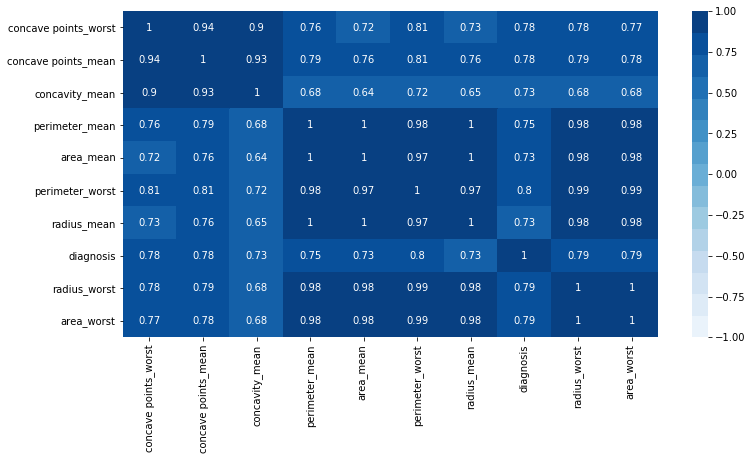

In [14]:
df_high_cor = df[hi_cor_features]

plt.figure(figsize=(12, 6))
sns.heatmap(df_high_cor.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("Blues", 15))
plt.show()

### Separating the Continuous and Categorical Features

In [15]:
cols = df.columns.to_list()
cat = []
cont = []

for col in cols:
    if df[col].nunique() < 10:
        cat.append(col)
    else:
        cont.append(col)  
        
cat

['diagnosis']

###  Univariate Analysis
#### Target Variable

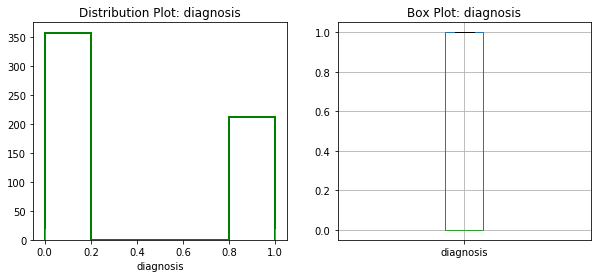

In [17]:
for col in cat:
        
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    sns.distplot(df[col], kde=False, rug=True, rug_kws={"color": "lightseagreen"}, hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
    plt.xlabel(col)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,2,2)
    df.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))
    plt.show()

#### Continuous Features

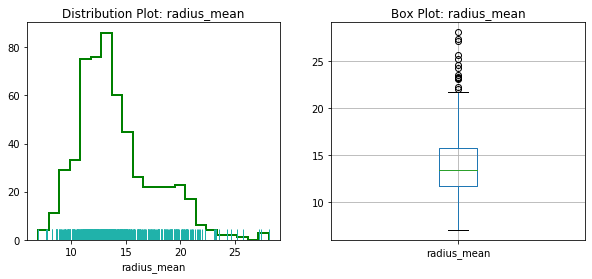

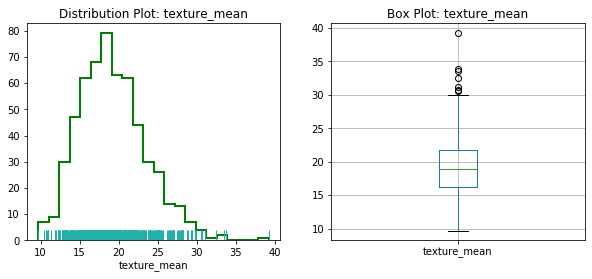

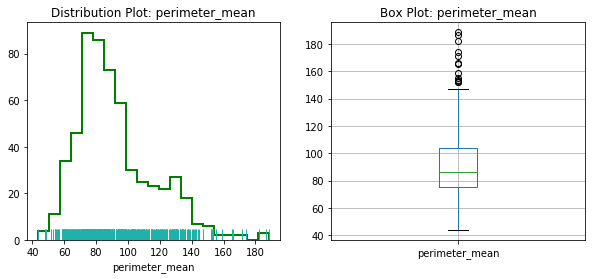

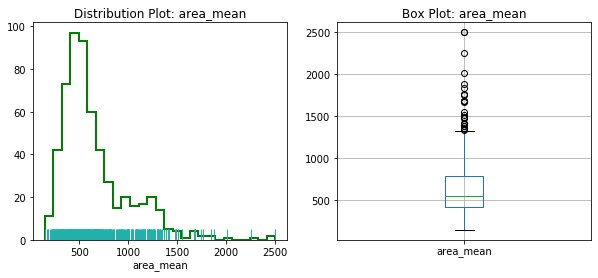

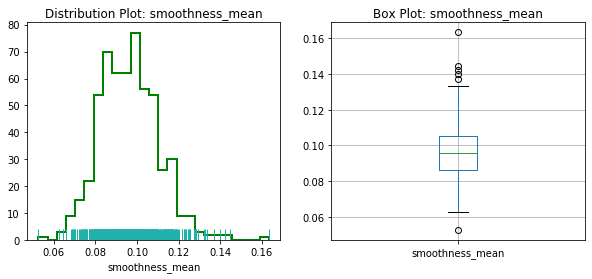

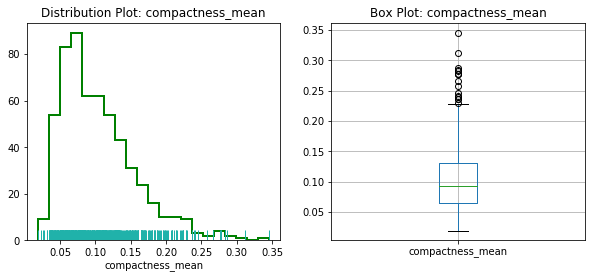

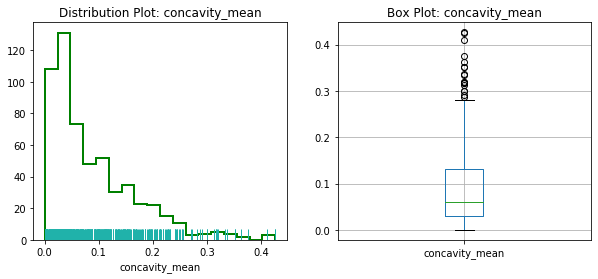

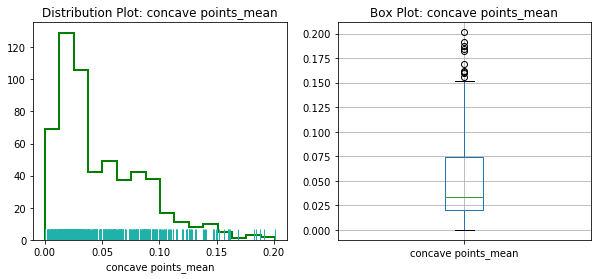

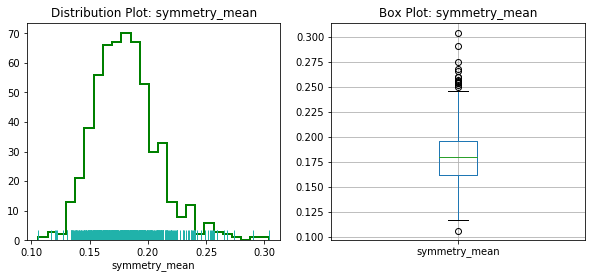

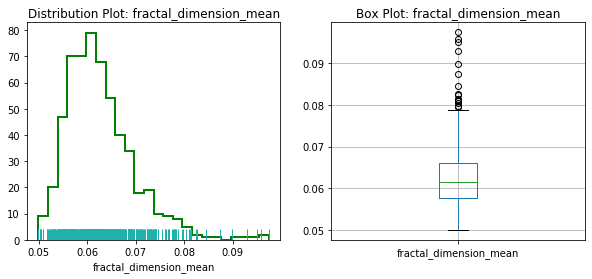

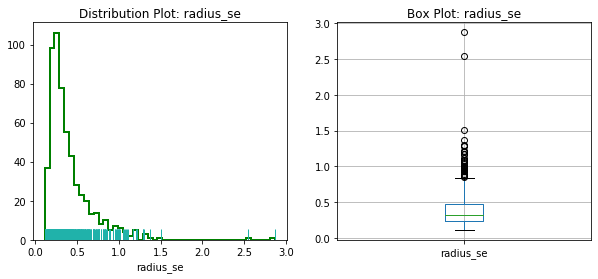

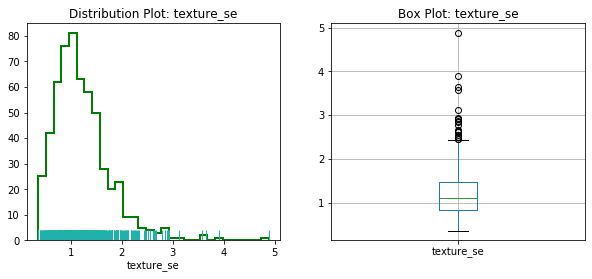

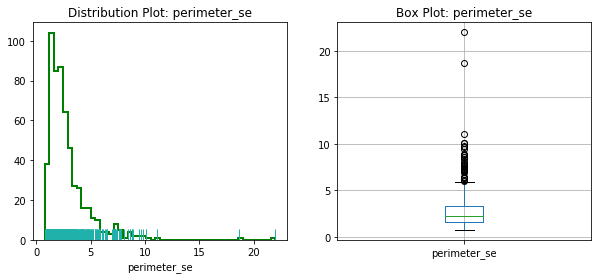

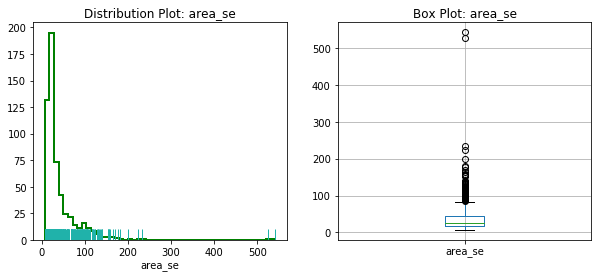

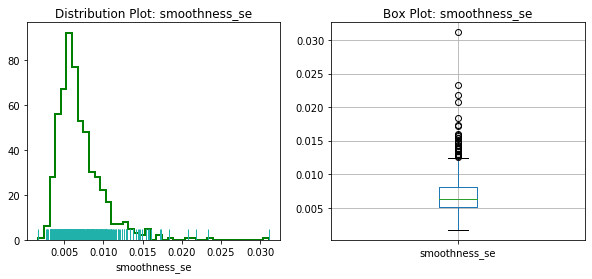

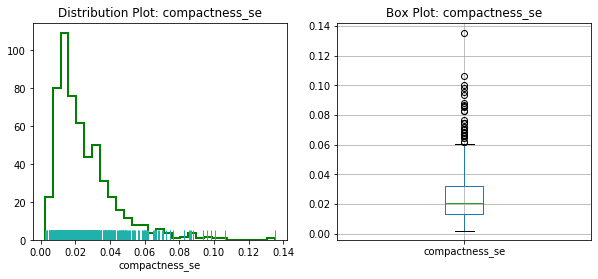

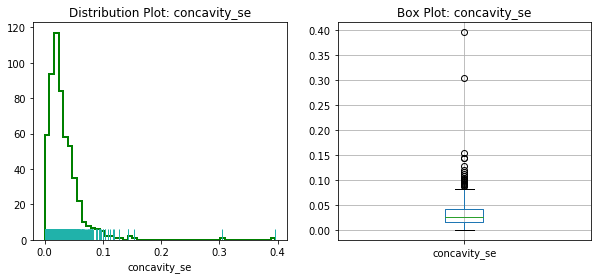

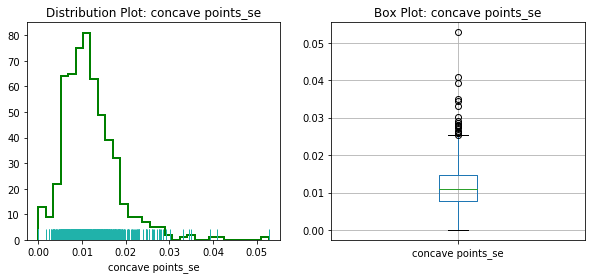

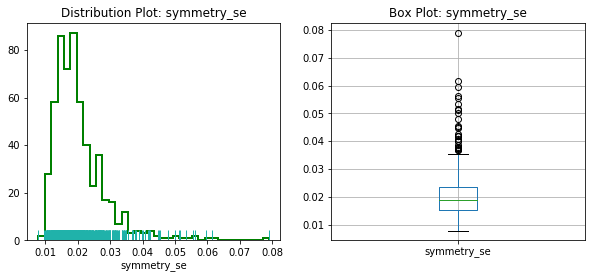

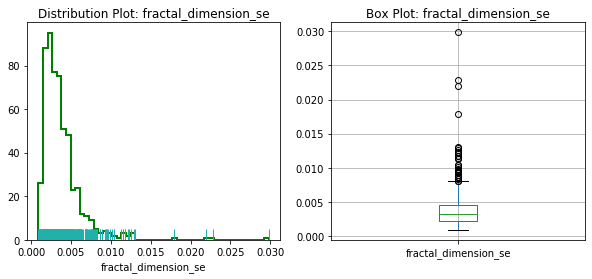

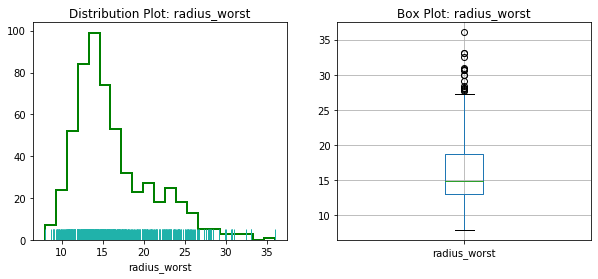

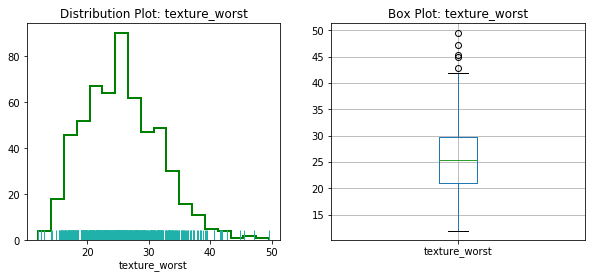

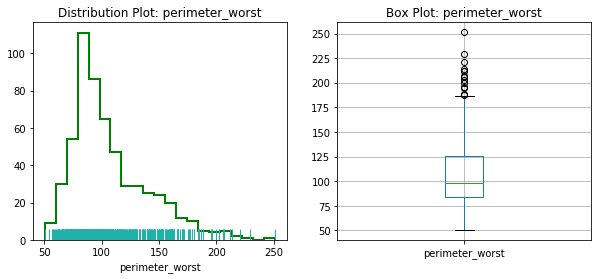

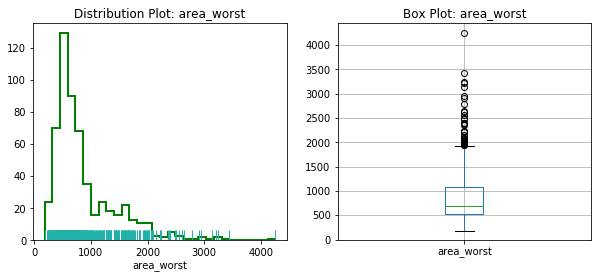

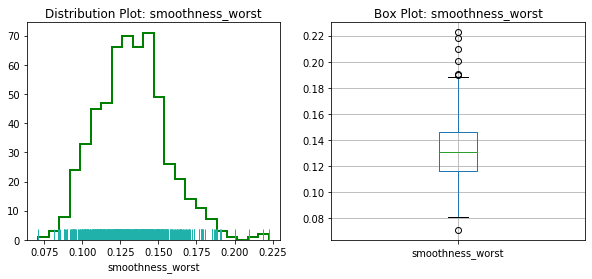

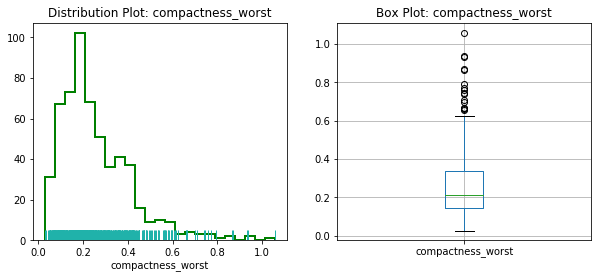

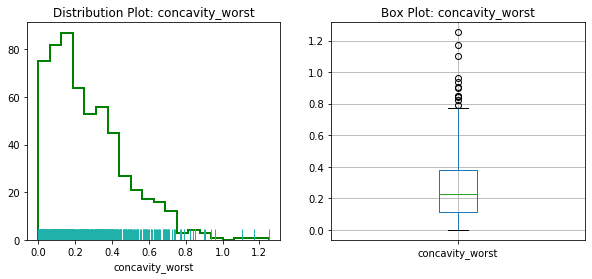

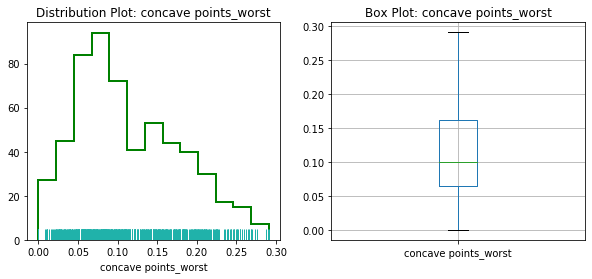

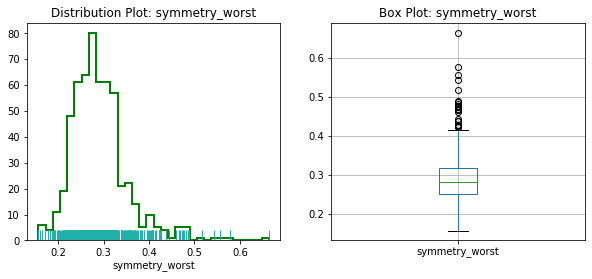

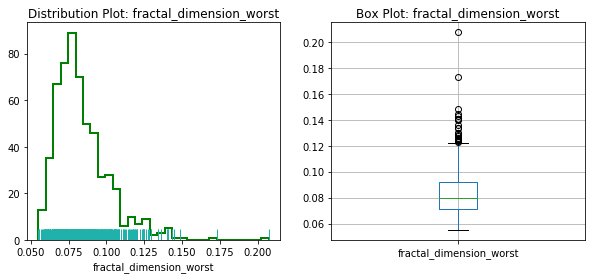

In [19]:
for col in cont:
        
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    sns.distplot(df[col], kde=False, rug=True, rug_kws={"color": "lightseagreen"}, hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
    plt.xlabel(col)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,2,2)
    df.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))
    plt.show()

### Bivariate Analysis

#### Continuous Features vs Target Variable

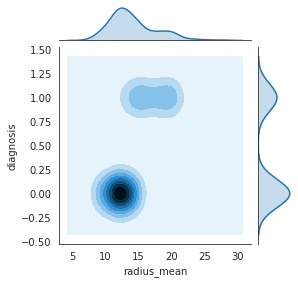

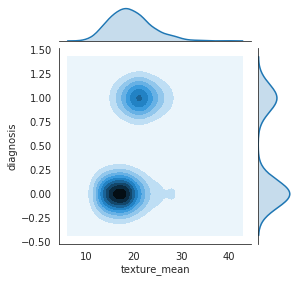

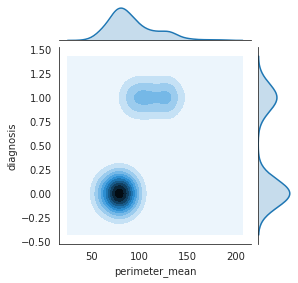

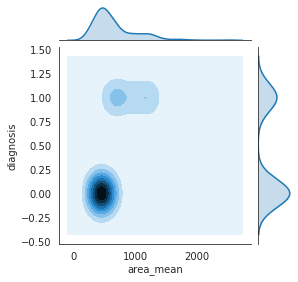

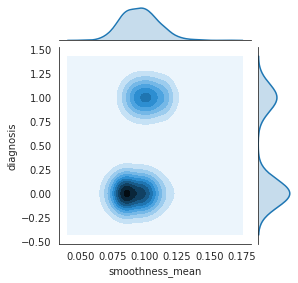

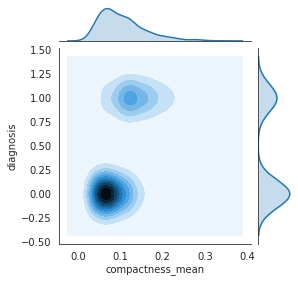

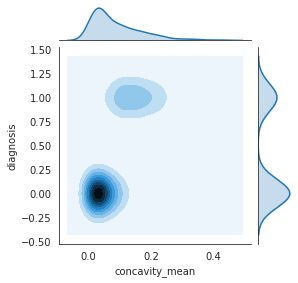

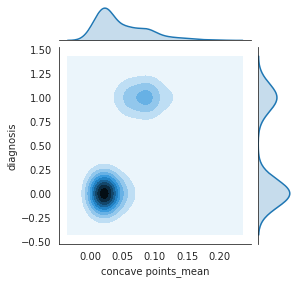

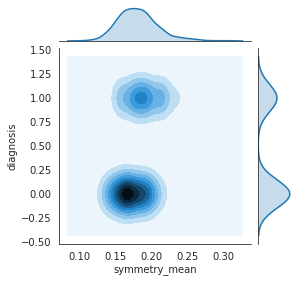

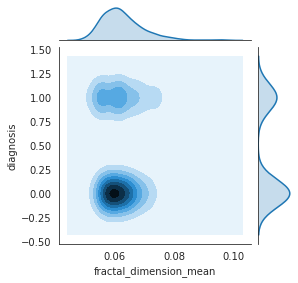

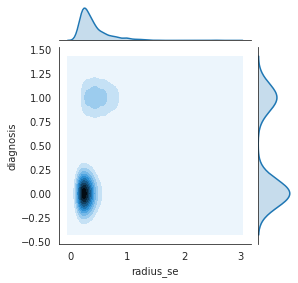

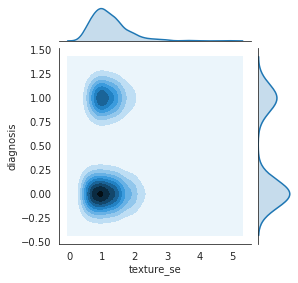

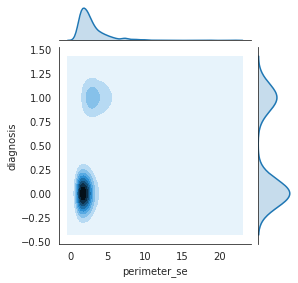

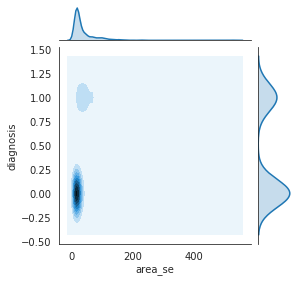

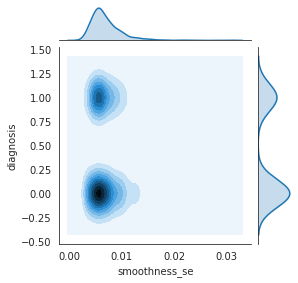

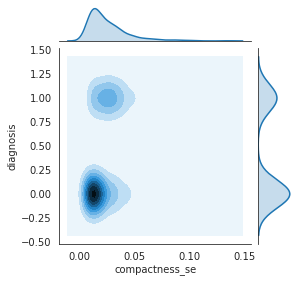

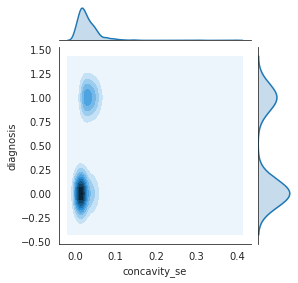

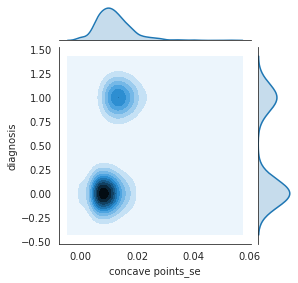

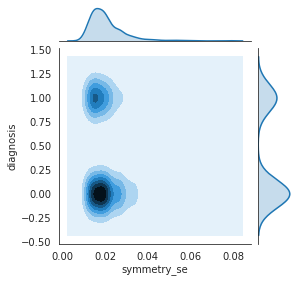

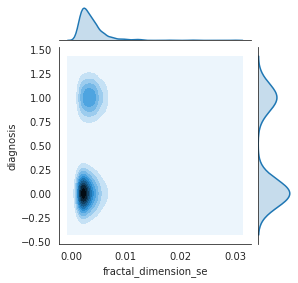

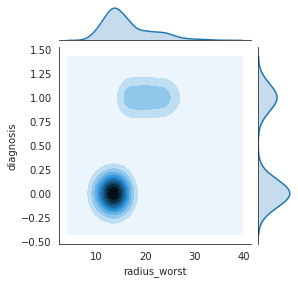

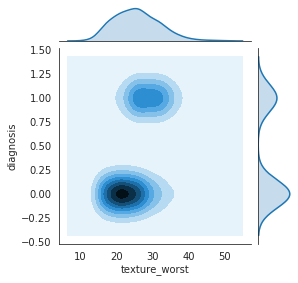

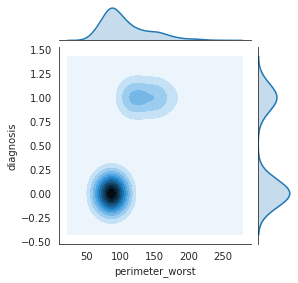

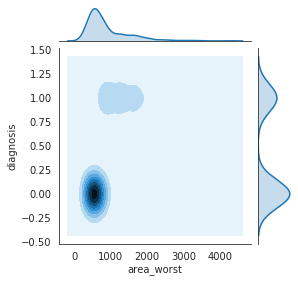

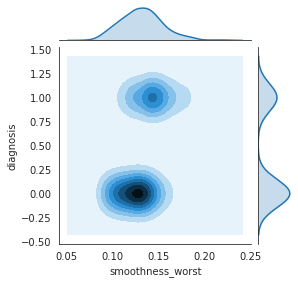

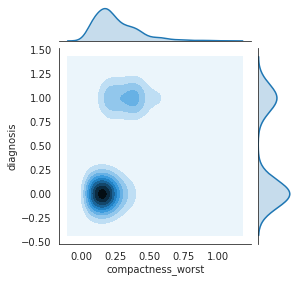

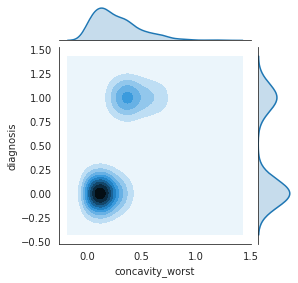

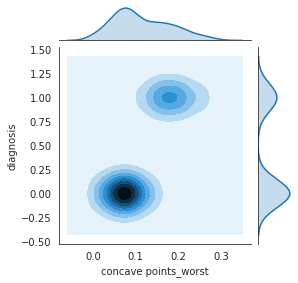

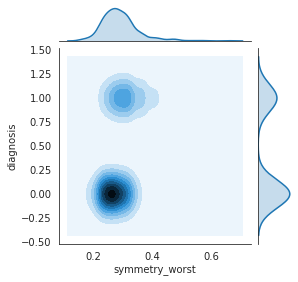

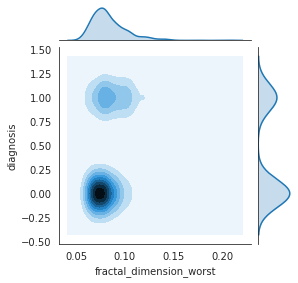

In [20]:
for col in cont:
    
    with sns.axes_style('white'):
        sns.jointplot(col, "diagnosis", df, kind='kde', height=4);

    plt.show()

#### Interesting Obsevation between Continuous Features and Target Variables

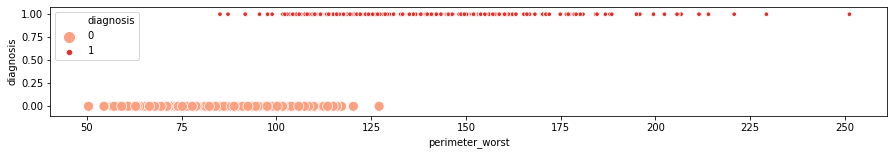

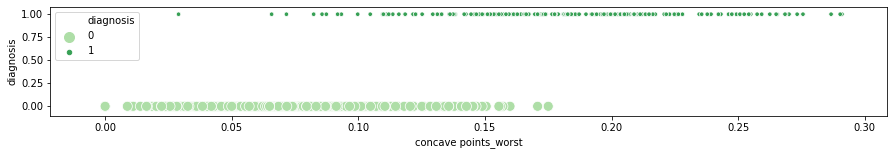

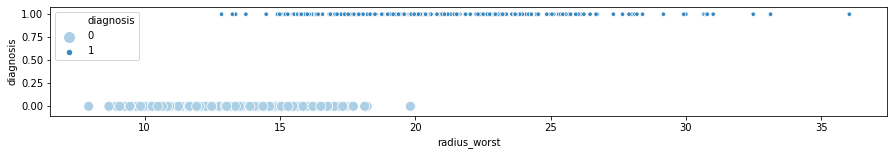

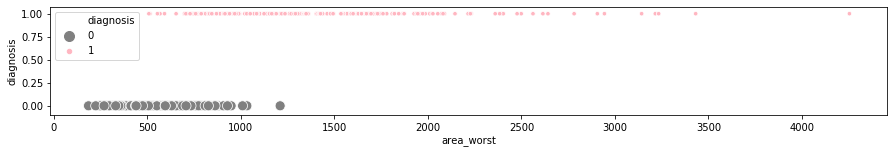

In [21]:
plt.figure(figsize=(15, 2))
sns.scatterplot(
    data=df, x="perimeter_worst", y="diagnosis", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette='Reds')
plt.show()

plt.figure(figsize=(15, 2))
sns.scatterplot(
    data=df, x="concave points_worst", y="diagnosis", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette='Greens')
plt.show()

plt.figure(figsize=(15, 2))
sns.scatterplot(
    data=df, x="radius_worst", y="diagnosis", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette='Blues')
plt.show()

plt.figure(figsize=(15, 2))
sns.scatterplot(
    data=df, x="area_worst", y="diagnosis", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette=["gray", "lightpink"])
plt.show()

### Multivariate Analysis

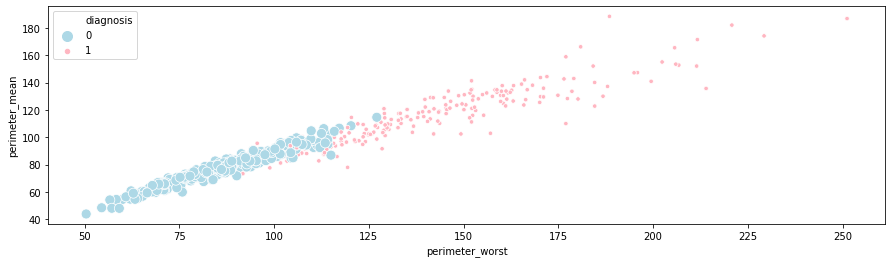

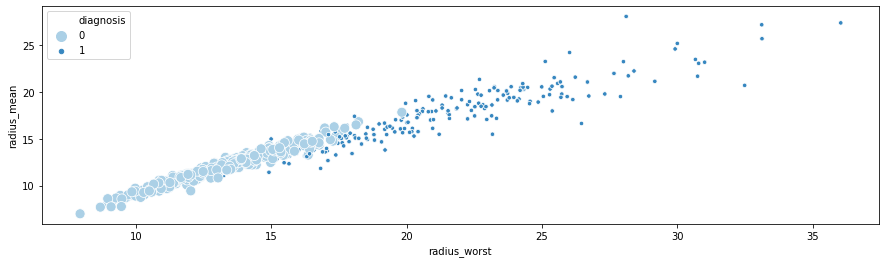

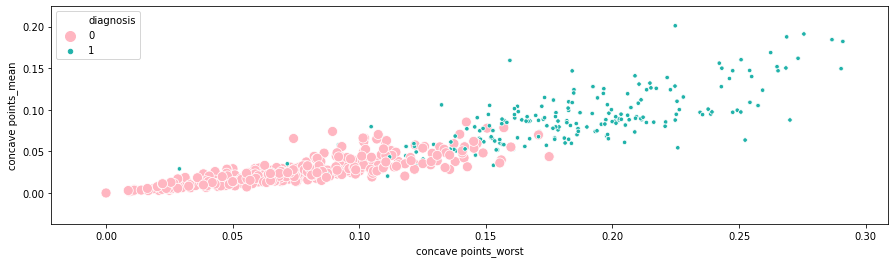

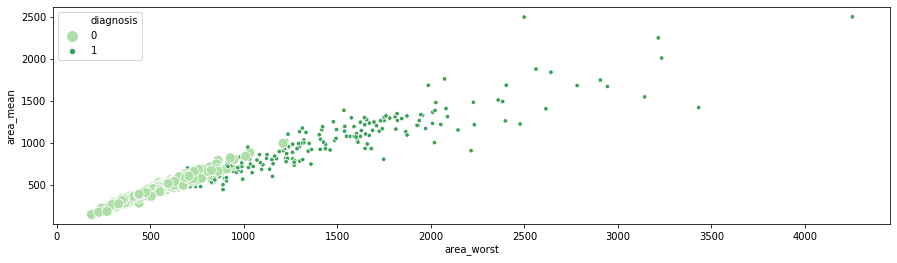

In [22]:
plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="perimeter_worst", y="perimeter_mean", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette=["lightblue", "lightpink"])
plt.show()

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="radius_worst", y="radius_mean", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette='Blues')
plt.show()

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="concave points_worst", y="concave points_mean", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette=["lightpink", "lightseagreen"])
plt.show()

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="area_worst", y="area_mean", hue="diagnosis", size="diagnosis",
    sizes=(20, 100), legend="full", palette='Greens')
plt.show()

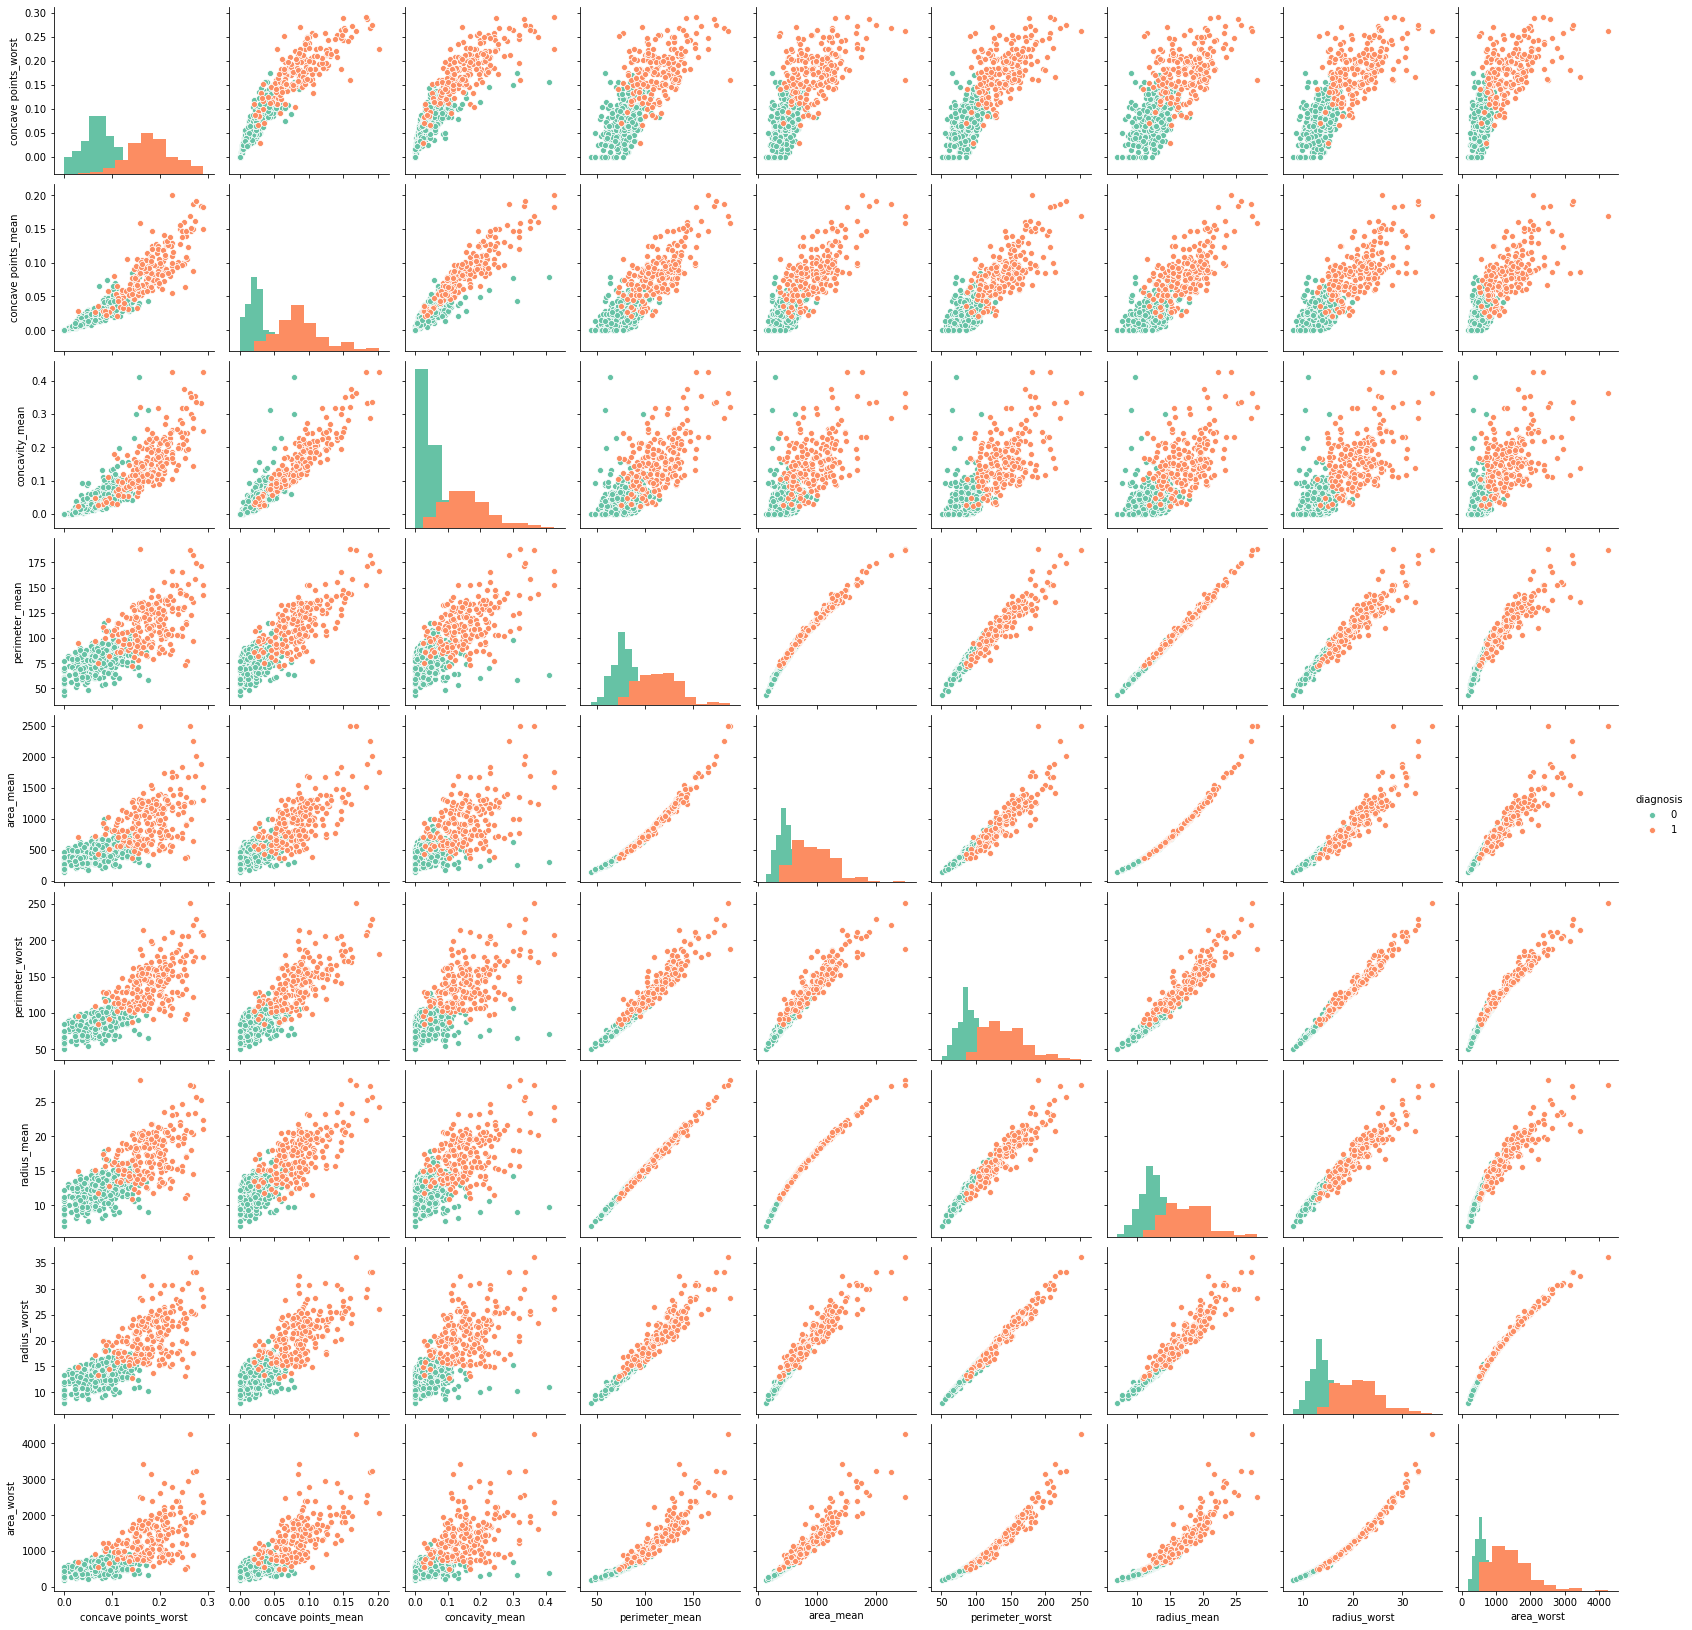

In [29]:
hi_cor_features = ['concave points_worst',
 'concave points_mean',
 'concavity_mean',
 'perimeter_mean',
 'area_mean',
 'perimeter_worst',
 'radius_mean',
 'diagnosis',
 'radius_worst',
 'area_worst', 'diagnosis']

df_pairplot = df[hi_cor_features]
sns.pairplot(df_high_cor, hue="diagnosis", diag_kind="hist", corner=False, palette = 'Set2')